# PV Parameters

🌞 Thrilled to Introduce Two Web App Calculators for the Photovoltaics Community! 🚀🔌

1. Photovoltaic Parameters Calculator (Link: https://ivparameters.streamlit.app/)

Are you looking to optimize your photovoltaic devices and are stuck in the #deviceperformance, parameters extraction? Look no further! We created a #Photovoltaic Parameters Calculator here to simplify your i-v parameters calculation. Easily analyze your solar devices performance based on various input parameters. Just drag the data, and within a second you will get the results!! Embrace #data-driven efficiency with ease!

2. EQE-Jsc and Voltage-Loss Analysis Calculator (Link: [https://voltagelossanalysis.streamlit.app/])

Introducing cutting-edge EQE-Jsc and Voltage-Loss Analysis Calculator! This advanced tool empowers you to calculate integrated Jsc and perform voltage-loss analysis effortlessly. Gain insights into your solar cell's performance and identify areas for improvement. Whether you're a #researcher, #engineer, or #enthusiast, this app is a must-have in your photovoltaic toolkit!



🚀 Why Choose Calculators?

User-Friendly: apps are designed with simplicity in mind. No technical expertise required; drag your data and get results instantly!

Data-Driven: Backed by the latest research and technology, you can trust the accuracy of the calculations.

Free and Accessible: Both apps are available online, free of charge! Access them from anywhere, anytime.



🔬 Developed with Passion and Expertise

As a dedicated member of the photovoltaics community, I am thrilled to contribute to the advancement of renewable energy solutions. These calculators are a labor of love, created with a passion for sustainability and clean energy. My goal is to empower all solar enthusiasts, researchers, and professionals to make informed decisions and drive solar innovation forward!

For more detials of calcuations, please reach me:rakeshsuthar1996@gmail.com
and https://pubs.acs.org/doi/full/10.1021/acsami.2c18199

Thanks
Rakesh

# improting the libarary and user data

In [1]:
#Importing the necessary library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

In [33]:
# User Input
area_cm2 = float(input("Enter the area of the solar cell (in cm^2): "))
input_power_mw_cm2 = float(input("Enter the input power (in mW/cm^2): "))
bandgap_eV = float(input("Enter the bandgap value (in eV): "))
data = pd.read_csv('I_V.csv')  # i-v .csv file, two column voltage (V) and current (mA/cm^2)
eqe_data = pd.read_csv('EQE.csv')  #EQE .csv file, two column wavelngth (nm) and EQE (%)

Enter the area of the solar cell (in cm^2): 0.06
Enter the input power (in mW/cm^2): 100
Enter the bandgap value (in eV): 1.5


In [3]:
#define the interpolation/extrapolation (to generate more datapoint)

def interpolate_data(original_data, num_new_points):
    x_original = original_data['Voltage'].values
    y_original = original_data['Current'].values
    x_new = np.linspace(x_original.min(), x_original.max(), num_new_points)
    y_new = np.interp(x_new, x_original, y_original)
    new_data = pd.DataFrame({'Voltage': x_new, 'Current': y_new})
    return new_data

## Current Density-Voltage Characterstics and parameters

In [4]:
num_new_points = 1000
new_data = interpolate_data(data, num_new_points)

In [5]:
#defining the column name and the calculating the current density and power
voltage = new_data['Voltage']
current = new_data['Current']
current_density = 1000*current/area_cm2
new_data['current_density'] = current = 1000* new_data['Current'] /area_cm2
new_data['Power'] = new_data['Voltage'] * new_data['current_density']
power = new_data['Power'] 

In [6]:
#Calculating the photovoltaics parameters and showing the results
jsc_current = -current_density[voltage.abs().argmin()]
voc_voltage = voltage[current_density.abs().argmin()]
p_max =np.min(power)
Fill_Factor =  -100*p_max / (jsc_current * voc_voltage )
PCE = (jsc_current * voc_voltage * Fill_Factor) / input_power_mw_cm2

print(f"Short-Circuit Current (Jsc): {jsc_current:.3f} mA/cm^2")
print(f"Open-Circuit Voltage (Voc): {voc_voltage:.3f} V")
print(f"Fill Factor (FF): {Fill_Factor:.3f} %")
print(f"Power Conversion Efficiency (PCE): {PCE:.3f} %")

Short-Circuit Current (Jsc): 24.167 mA/cm^2
Open-Circuit Voltage (Voc): 0.819 V
Fill Factor (FF): 72.691 %
Power Conversion Efficiency (PCE): 14.381 %


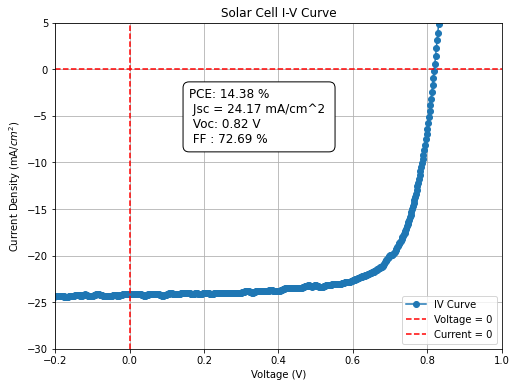

In [7]:
# Ploting the graph
plt.figure(figsize=(8, 6))
plt.plot(voltage, current_density, label='IV Curve', marker='o')
plt.axvline(x=0, color='r', linestyle='--', label='Voltage = 0')
plt.axhline(y=0, color='r', linestyle='--', label='Current = 0')
plt.xlabel('Voltage (V)')
plt.ylabel('Current Density (mA/$cm^{2}$)')
plt.title('Solar Cell I-V Curve')
plt.xlim(-0.2, 1)
plt.ylim(-30, 5)
plt.legend()
plt.grid(True)
textbox_text = f'PCE: {PCE:.2f} % \n Jsc = {jsc_current:.2f} mA/cm^2 \n Voc: {voc_voltage:.2f} V \n FF : {Fill_Factor:.2f} %'
textbox_x = 0.3  # X-coordinate (0.0 to 1.0) of the textbox (0.5 = center)
textbox_y = 0.8  # Y-coordinate (0.0 to 1.0) of the textbox (0.2 = 20% from the bottom)
plt.text(textbox_x, textbox_y, textbox_text, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='white'))
plt.show()

## Jsc from the EQE calculation

In [34]:
# Importing the AM1.5G data (reference: https://www.nrel.gov/grid/solar-resource/spectra-am1.5.html)
am15_data = pd.read_csv('AM15G.csv')
am15_wavelength = am15_data['Wavelength']
am15_intensity = am15_data['Intensity']
am15_energy = 1240/am15_wavelength
# Convert AM1.5 intensity to flux (AM1.5G / energy eV)
am15_flux = am15_intensity / (1240 / am15_wavelength)

In [35]:
# Function to interpolate data and ensure step size of 1 for 'Wavelength' and 'EQE'
def interpolate_and_update_data(original_data):
    x_original = original_data['Wavelength'].values
    y_original = original_data['EQE'].values
    step_size = np.diff(x_original).min()
    if step_size != 1:
        x_new = np.arange(x_original.min(), x_original.max() + 1)
        y_new = np.interp(x_new, x_original, y_original)
        original_data = pd.DataFrame({'Wavelength': x_new, 'EQE': y_new})
    return original_data

In [36]:
updated_eqe_data = interpolate_and_update_data(eqe_data.copy())

In [37]:
# Ensure that 'Wavelength' column in updated_eqe_data matches the AM1.5G wavelength range
updated_eqe_data = updated_eqe_data[updated_eqe_data['Wavelength'].isin(am15_wavelength)]

In [38]:
# Calculating the Integrating Jsc
product_eqe_am15 = 0.001 * np.interp(am15_wavelength, updated_eqe_data['Wavelength'], updated_eqe_data['EQE']) * am15_flux
cumulative_sum = product_eqe_am15.cumsum()
integrated_jsc = cumulative_sum.iloc[-1]
print("Integrated Short-Circuit Current (Jsc): {:.2f} mA/cmÂ²".format(integrated_jsc))

Integrated Short-Circuit Current (Jsc): 14.09 mA/cmÂ²


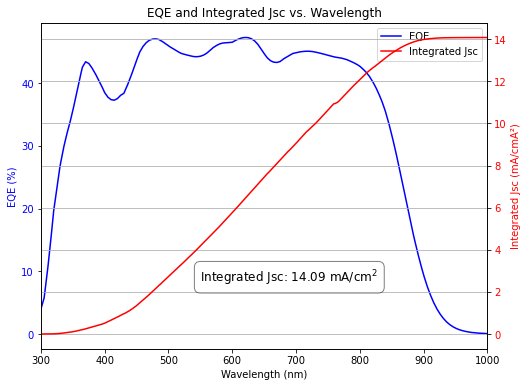

In [39]:
# Ploting Graph
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.plot(updated_eqe_data['Wavelength'], updated_eqe_data['EQE'], label='EQE', color='blue')
ax1.set_xlabel('Wavelength (nm)')
ax1.set_ylabel('EQE (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
ax2.plot(am15_wavelength, cumulative_sum, label='Integrated Jsc', color='red')
ax2.set_ylabel('Integrated Jsc (mA/cmA²)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2)
position_x = 550  # Change the value based on the desired X-coordinate of the text box
position_y = 2.5  # Change the value based on the desired Y-coordinate of the text box

ax2.text(position_x, position_y, f'Integrated Jsc: {integrated_jsc:.2f} mA/cm$^2$',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.5), fontsize=12)
plt.title('EQE and Integrated Jsc vs. Wavelength')
plt.xlim(300, 1000)  # Set X-axis limits to 300 to 1000
plt.grid(True)
plt.show()

## Calculate Jsc_SQ based on the SQ limit for a given bandgap

In [40]:
def calculate_jsc_sq(bandgap_eV, eqe_percent):
    # Convert EQE percentage to decimal fraction
    eqe = eqe_percent / 100.0
    jsc_sq_values = []
    jsc_sq = 0.0
    for energy, flux in zip(am15_wavelength, am15_flux):
        # Calculate the photon energy (in eV)
        photon_energy_eV = 1240 / energy

        # Determine the EQE value based on the photon energy and bandgap
        if photon_energy_eV >= bandgap_eV:
            eqe = eqe  # Use the given EQE percentage above the bandgap
        else:
            eqe = 0.0  # 0% EQE below the bandgap

        # Calculate the SQ limit for the current wavelength and add it to Jsc_SQ
        sq_limit = 0.1 * (flux * eqe)
        jsc_sq += sq_limit
        jsc_sq_values.append(jsc_sq)
    return jsc_sq_values

In [41]:
# Jsc_SQ for different levels of EQE (100%, 90%, 80%, ...)
eqe_levels = [100, 90, 80, 70, 60]
jsc_sq_values = {}
for eqe_percent in eqe_levels:
    jsc_sq = calculate_jsc_sq(bandgap_eV, eqe_percent)
    jsc_sq_values[f'EQE {eqe_percent}%'] = jsc_sq

In [42]:
bandgap_jsc_sq = jsc_sq_values['EQE 100%']
print(f"Jsc_SQ at {bandgap_eV} eV bandgap with 100% EQE: {bandgap_jsc_sq[-1]:.2f} mA/cmÂ²")

Jsc_SQ at 1.5 eV bandgap with 100% EQE: 28.97 mA/cmÂ²


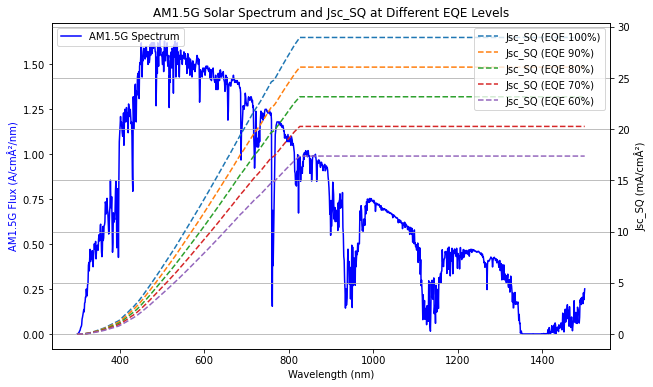

In [43]:
# Plot AM1.5G solar spectrum and Jsc_SQ at different EQE levels
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()
ax1.plot(am15_wavelength, am15_intensity, label='AM1.5G Spectrum', color='b')
ax1.set_xlabel('Wavelength (nm)')
ax1.set_ylabel('AM1.5G Flux (A/cmÂ²/nm)', color='b')
for eqe_percent, jsc_sq in jsc_sq_values.items():
    ax2.plot(am15_wavelength, jsc_sq, label=f'Jsc_SQ ({eqe_percent})', linestyle='--')
ax2.set_ylabel('Jsc_SQ (mA/cmÂ²)')
ax1.set_title('AM1.5G Solar Spectrum and Jsc_SQ at Different EQE Levels')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.grid(True)
plt.show()

## Calculation for the Voc_SQ 

In [44]:
data = pd.read_csv('PhiiBB.csv')

In [45]:
phiBB_wavelength = data['Wavelength'].values
phiBB_intensity = data['Intensity'].values

In [46]:
energy = 1240 / phiBB_wavelength

In [47]:
bandgap_index = np.argmax(energy < bandgap_eV)

In [48]:
accumulated_intensity = np.trapz(phiBB_intensity[:bandgap_index], am15_wavelength[:bandgap_index])
# print(f"Accumulated intensity until the bandgap: {accumulated_intensity:.2e}")

In [49]:
q = 1.6e-19  # Charge of an electron in coulombs
j0 = accumulated_intensity * q  # Convert to mA/cmÂ²

In [50]:
voc_sq = 0.026 *np.log((bandgap_jsc_sq[-1]/ j0) + 1)

In [51]:
print(f"Voc_SQ at {bandgap_eV} eV bandgap: {voc_sq:.3f} V")

Voc_SQ at 1.5 eV bandgap: 1.247 V


## Calculation for the Voc_rad

In [52]:
product_eqe_phiBB = np.interp(am15_wavelength, updated_eqe_data['Wavelength'], updated_eqe_data['EQE']) * phiBB_intensity
# Calculate the accumulated intensity using the trapezoidal rule
integrated_j0_energy = np.trapz(phiBB_intensity[:bandgap_index], am15_wavelength[:bandgap_index])
integrated_j0_energy_1 = 1000 * q * integrated_j0_energy
# print(f"Accumulated intensity until the bandgap: {integrated_j0_energy_1:.2e}")

In [53]:
voc_radiative =  0.026 * np.log((integrated_jsc) / integrated_j0_energy_1 + 1)
print(f"Voc_radiative at {bandgap_eV} eV bandgap: {voc_radiative:.23} V")

Voc_radiative at 1.5 eV bandgap: 1.0487390596215235838429 V


In [56]:
# Ploting te graph for the losses
delta_V1 = bandgap_eV - voc_sq
delta_V2 = voc_sq - voc_radiative
delta_V3 = voc_radiative - voc_voltage

print(f"Delta V1 (Bandgap - VOC_SQ): {delta_V1:.2f} V")
print(f"Delta V2 (VOC_SQ - VOC_RAD): {delta_V2:.2f} V")
print(f"Delta V3 (VOC_RAD - VOC): {delta_V3:.2f} V")

Delta V1 (Bandgap - VOC_SQ): 0.25 V
Delta V2 (VOC_SQ - VOC_RAD): 0.20 V
Delta V3 (VOC_RAD - VOC): 0.23 V


bar diagram for the values and differences

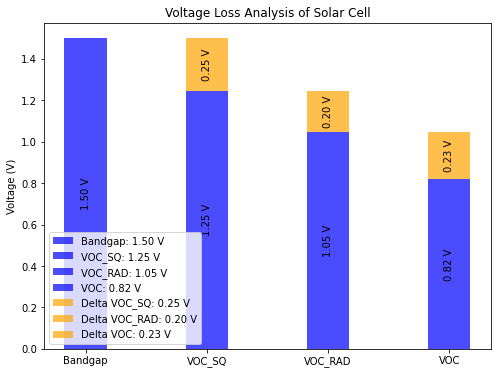

<Figure size 432x288 with 0 Axes>

In [55]:
labels = ['Bandgap', 'VOC_SQ', 'VOC_RAD', 'VOC']
values = [bandgap_eV, voc_sq, voc_radiative, voc_voltage]
differences = [delta_V1, delta_V2, delta_V3]
units = ['V', 'V', 'V', 'V']
# Plot the bar diagram
fig, ax = plt.subplots(figsize=(8, 6))
width = 0.35
for i, (label, value, unit) in enumerate(zip(labels, values, units)):
    ax.bar(label, value, width, label=f'{label}: {value:.2f} {unit}', color='blue', alpha=0.7)
    ax.text(i, value / 2, f'{value:.2f} {unit}', ha='center', va='center', fontsize=10, rotation=90)

for i, (label, difference, unit) in enumerate(zip(labels[1:], differences, units[1:])):
    ax.bar(label, difference, width, bottom=values[i+1], label=f'Delta {label}: {difference:.2f} {unit}', color='orange', alpha=0.7)
    ax.text(i + 1, values[i+1] + difference / 2, f'{difference:.2f} {unit}', ha='center', va='center', fontsize=10, rotation=90)
    
    
ax.set_ylabel('Voltage (V)')
ax.set_title('Voltage Loss Analysis of Solar Cell')
ax.legend()
plt.show()
plt.savefig("Loss.jpg")